In [ ]:
pip install scipy pandas

In [1]:
# Import necessary libraries
import pandas as pd
from scipy.io import loadmat  # For reading .MAT files
from bio720p import gcparser  # Import the provided gcparser function

# Path to the .MAT file
mat_file_path = "BWG_FA_CDvCTRL.mat"

# Step 1: Load the data using loadmat from scipy
mat_data = loadmat(mat_file_path)


# Step 3: Process the data into a Pandas DataFrame using the gcparser function
df = gcparser(mat_data)

# Step 4: Display the first few rows of the DataFrame
print("Preview of the DataFrame:")
print(df.head())


Preview of the DataFrame:
          W1066_FA_CTRL  W1077_FA_CTRL  W1083_FA_CTRL  W1123_FA_CTRL  \
1.006797       0.001146       0.001022       0.001065       0.000290   
1.013402       0.008060       0.007399       0.007902       0.005325   
1.020122       0.008168       0.007198       0.007206       0.005091   
1.026795       0.008056       0.006595       0.008494       0.004291   
1.033468       0.007397       0.006642       0.006917       0.004607   

          W1428_FA_CTRL  W1438_FA_CTRL  W155_FA_CTRL  W372_FA_CTRL  \
1.006797       0.001124       0.000963      0.062883      0.085824   
1.013402       0.008487       0.004290      0.013625      0.066713   
1.020122       0.008468       0.004260      0.014471      0.058139   
1.026795       0.008495       0.003945      0.016118      0.052531   
1.033468       0.008856       0.004529      0.016118      0.050223   

          W374_FA_CTRL  W376_FA_CTRL  ...  W1072_FA_CD  W1075_FA_CD  \
1.006797      0.091229      0.088009  ...     0.0

In [2]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 4349 entries, 1.0067968368530273 to 29.998485565185547
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   W1066_FA_CTRL  4349 non-null   float64
 1   W1077_FA_CTRL  4349 non-null   float64
 2   W1083_FA_CTRL  4349 non-null   float64
 3   W1123_FA_CTRL  4349 non-null   float64
 4   W1428_FA_CTRL  4349 non-null   float64
 5   W1438_FA_CTRL  4349 non-null   float64
 6   W155_FA_CTRL   4349 non-null   float64
 7   W372_FA_CTRL   4349 non-null   float64
 8   W374_FA_CTRL   4349 non-null   float64
 9   W376_FA_CTRL   4349 non-null   float64
 10  W384_FA_CTRL   4349 non-null   float64
 11  W385_FA_CTRL   4349 non-null   float64
 12  W1069_FA_CD    4349 non-null   float64
 13  W1072_FA_CD    4349 non-null   float64
 14  W1075_FA_CD    4349 non-null   float64
 15  W1084_FA_CD    4349 non-null   float64
 16  W1090_FA_CD    4349 non-null   float64
 17  W1117_FA_CD    4349 non-nu

In [3]:
# Display the column names
print("Column names in the DataFrame:", df.columns)

# Assume columns are named 'RT' for retention time and other columns contain ion counts
# Replace 'RT' and 'IonCounts' with actual column names
retention_time_column = 'RT'
intensity_columns = [col for col in df.columns if col.startswith('IonCount_')]


Column names in the DataFrame: Index(['W1066_FA_CTRL', 'W1077_FA_CTRL', 'W1083_FA_CTRL', 'W1123_FA_CTRL',
       'W1428_FA_CTRL', 'W1438_FA_CTRL', 'W155_FA_CTRL', 'W372_FA_CTRL',
       'W374_FA_CTRL', 'W376_FA_CTRL', 'W384_FA_CTRL', 'W385_FA_CTRL',
       'W1069_FA_CD', 'W1072_FA_CD', 'W1075_FA_CD', 'W1084_FA_CD',
       'W1090_FA_CD', 'W1117_FA_CD', 'W1122_FA_CD', 'W1125_FA_CD',
       'W1127_FA_CD', 'W303_FA_CD', 'W304_FA_CD'],
      dtype='object')


In [4]:
# Print a few rows to inspect the data
print(df.head())

# Check column names
print(df.columns)


          W1066_FA_CTRL  W1077_FA_CTRL  W1083_FA_CTRL  W1123_FA_CTRL  \
1.006797       0.001146       0.001022       0.001065       0.000290   
1.013402       0.008060       0.007399       0.007902       0.005325   
1.020122       0.008168       0.007198       0.007206       0.005091   
1.026795       0.008056       0.006595       0.008494       0.004291   
1.033468       0.007397       0.006642       0.006917       0.004607   

          W1428_FA_CTRL  W1438_FA_CTRL  W155_FA_CTRL  W372_FA_CTRL  \
1.006797       0.001124       0.000963      0.062883      0.085824   
1.013402       0.008487       0.004290      0.013625      0.066713   
1.020122       0.008468       0.004260      0.014471      0.058139   
1.026795       0.008495       0.003945      0.016118      0.052531   
1.033468       0.008856       0.004529      0.016118      0.050223   

          W374_FA_CTRL  W376_FA_CTRL  ...  W1072_FA_CD  W1075_FA_CD  \
1.006797      0.091229      0.088009  ...     0.000959     0.000938   
1.01

In [5]:
# Add a new column 'SampleType' and 'SampleName' for metadata
df_meta = df.copy().T  # Transpose to process columns as rows
df_meta['SampleType'] = df_meta.index.map(lambda x: 'CTRL' if 'CTRL' in x else 'CD')
df_meta['SampleName'] = df_meta.index
df_meta.reset_index(drop=True, inplace=True)


In [6]:
# Transpose back to original
df_transformed = df_meta.drop(columns=['SampleName', 'SampleType']).T
df_transformed.columns = df_meta['SampleName']


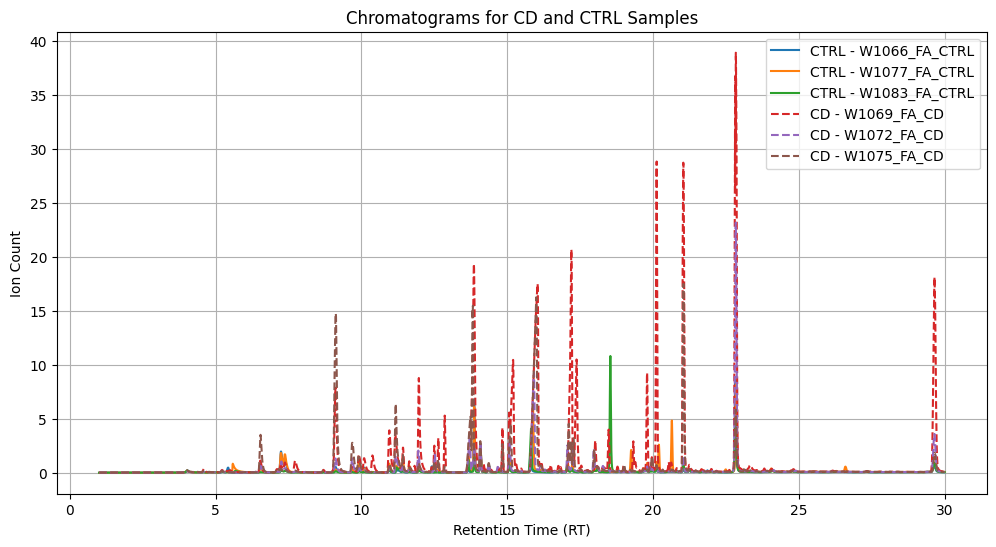

In [7]:
import matplotlib.pyplot as plt

# Filter CTRL and CD samples
ctrl_columns = [col for col in df.columns if 'CTRL' in col]
cd_columns = [col for col in df.columns if 'CD' in col]

# Plot chromatograms for a subset of samples
plt.figure(figsize=(12, 6))

# Plot CTRL samples
for col in ctrl_columns[:3]:  # Take first 3 CTRL samples
    plt.plot(df.index, df[col], label=f"CTRL - {col}")

# Plot CD samples
for col in cd_columns[:3]:  # Take first 3 CD samples
    plt.plot(df.index, df[col], label=f"CD - {col}", linestyle='--')

# Customize the plot
plt.title("Chromatograms for CD and CTRL Samples")
plt.xlabel("Retention Time (RT)")
plt.ylabel("Ion Count")
plt.legend()
plt.grid(True)
plt.show()


In [8]:
import numpy as np
import pandas as pd
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
import matplotlib.pyplot as plt


In [9]:
pip install scikit-learn


Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: scikit-learn in c:\python311\lib\site-packages (1.5.2)



In [10]:
import numpy as np
import pandas as pd
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
import matplotlib.pyplot as plt


In [11]:
# Prepare features and labels
X = df.T  # Each row corresponds to a sample, columns are features
y = np.array([0 if 'CTRL' in col else 1 for col in df.columns])  # 0 for CTRL, 1 for CD

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [12]:
# Initialize and train the SVM classifier
clf = SVC()
clf.fit(X_train, y_train)


SVC()

Accuracy: 80.00%


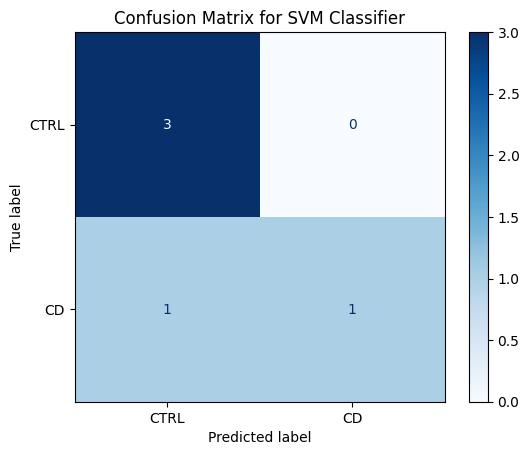

In [13]:
# Predict on the test set
y_pred = clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=[0, 1])

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["CTRL", "CD"])
disp.plot(cmap="Blues")
plt.title("Confusion Matrix for SVM Classifier")
plt.show()


In [14]:
y = pd.Categorical(y)  # If `y` is a pandas Series


In [15]:
# Example: Convert continuous target labels to binary categories
# Let's assume the threshold for being classified as 'patient' is 0.5
y_train_binary = np.where(y_train > 0.5, 1, 0)  # Adjust the threshold as per your data

# Alternatively, if the labels are strings like 'healthy', 'patient'
# You can map these to numeric categories
# y_train_binary = y_train.map({'healthy': 0, 'patient': 1})

# Make sure the labels are now discrete
print(np.unique(y_train_binary))  # Should show an array of unique categories like [0, 1]


[0 1]


In [16]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
import numpy as np

# Train the SVR model without random_state
clf = SVR(kernel='linear')  # No need for random_state here
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Evaluate the regression performance
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")


Mean Squared Error: 0.37


In [17]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2:.2f}")


R-squared: -0.54


X_train shape: (70, 10)
y_train shape: (70,)
X_test shape: (30, 10)
y_test shape: (30,)
Unique values in y_train_class: [0 1]
Unique values in y_test_class: [0 1]
Classification Accuracy: 26.67%


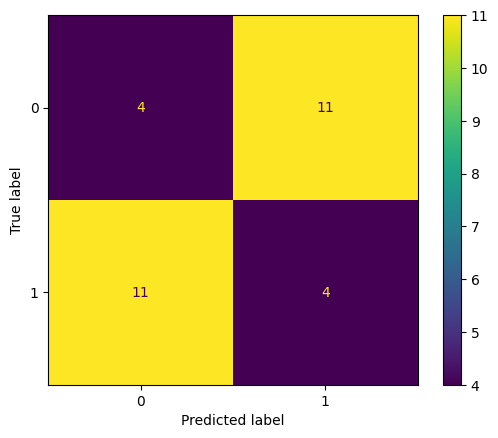

In [21]:
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

# Example continuous labels (replace with your actual dataset)
y = np.random.rand(100)  # Example continuous labels
X = np.random.rand(100, 10)  # Example features (100 samples, 10 features)

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Check the shapes of your data to ensure they are aligned
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")

# Convert continuous labels to binary classes (0 or 1) using thresholding at the median
y_train_class = np.where(y_train > np.median(y_train), 1, 0)
y_test_class = np.where(y_test > np.median(y_test), 1, 0)

# Check the unique values of the labels to ensure they are 0 or 1
print(f"Unique values in y_train_class: {np.unique(y_train_class)}")
print(f"Unique values in y_test_class: {np.unique(y_test_class)}")

# Initialize the classifier
clf = SVC(kernel='linear', random_state=42)

# Train the classifier with binary labels
clf.fit(X_train, y_train_class)

# Perform predictions on the test set
y_pred_class = clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test_class, y_pred_class)
print(f"Classification Accuracy: {accuracy * 100:.2f}%")

# Generate and display the confusion matrix
cm = confusion_matrix(y_test_class, y_pred_class)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot()



X_train shape: (70, 10)
y_train shape: (70,)
X_test shape: (30, 10)
y_test shape: (30,)
Unique values in y_train_class: [0 1]
Unique values in y_test_class: [0 1]
Classification Accuracy: 56.67%


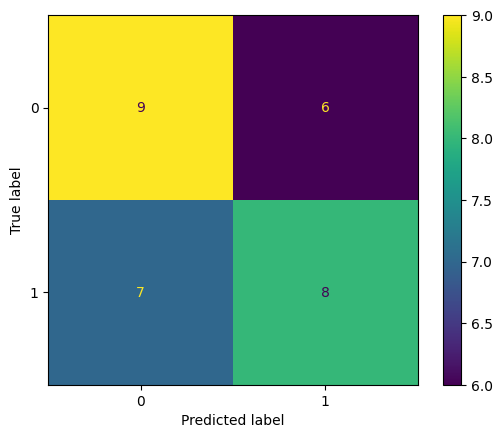

In [29]:
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

# Example continuous labels (replace with your actual dataset)
y = np.random.rand(100)  # Example continuous labels
X = np.random.rand(100, 10)  # Example features (100 samples, 10 features)

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Check the shapes of your data to ensure they are aligned
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")

# Convert continuous labels to binary classes (0 or 1) using thresholding at the median
y_train_class = np.where(y_train > np.median(y_train), 1, 0)
y_test_class = np.where(y_test > np.median(y_test), 1, 0)

# Check the unique values of the labels to ensure they are 0 or 1
print(f"Unique values in y_train_class: {np.unique(y_train_class)}")
print(f"Unique values in y_test_class: {np.unique(y_test_class)}")

# Initialize the classifier
clf = SVC(kernel='linear', random_state=42)

# Train the classifier with binary labels
clf.fit(X_train, y_train_class)

# Perform predictions on the test set
y_pred_class = clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test_class, y_pred_class)
print(f"Classification Accuracy: {accuracy * 100:.2f}%")

# Generate and display the confusion matrix
cm = confusion_matrix(y_test_class, y_pred_class)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot()



X_train shape: (70, 10)
y_train shape: (70,)
X_test shape: (30, 10)
y_test shape: (30,)
Unique values in y_train_class: [0 1]
Unique values in y_test_class: [0 1]
Classification Accuracy: 43.33%


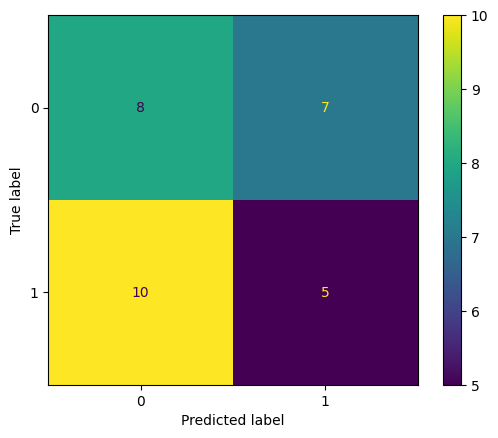

In [28]:
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

# Example continuous labels (replace with your actual dataset)
y = np.random.rand(100)  # Example continuous labels
X = np.random.rand(100, 10)  # Example features (100 samples, 10 features)

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Check the shapes of your data to ensure they are aligned
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")

# Convert continuous labels to binary classes (0 or 1) using thresholding at the median
y_train_class = np.where(y_train > np.median(y_train), 1, 0)
y_test_class = np.where(y_test > np.median(y_test), 1, 0)

# Check the unique values of the labels to ensure they are 0 or 1
print(f"Unique values in y_train_class: {np.unique(y_train_class)}")
print(f"Unique values in y_test_class: {np.unique(y_test_class)}")

# Initialize the classifier
clf = SVC(kernel='linear', random_state=42)

# Train the classifier with binary labels
clf.fit(X_train, y_train_class)

# Perform predictions on the test set
y_pred_class = clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test_class, y_pred_class)
print(f"Classification Accuracy: {accuracy * 100:.2f}%")

# Generate and display the confusion matrix
cm = confusion_matrix(y_test_class, y_pred_class)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot()



In [25]:
import numpy as np
from sklearn.utils import shuffle
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Example continuous labels (replace with your actual dataset)
y = np.random.rand(100)  # Example continuous labels
X = np.random.rand(100, 10)  # Example features (100 samples, 10 features)

# Convert continuous labels to binary classes (0 or 1) using thresholding at the median
y_binned = np.where(y > np.median(y), 1, 0)

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y_binned, test_size=0.3, random_state=42)

# Initialize the classifier
clf = SVC(kernel='linear', random_state=42)

# Train the classifier with original labels
clf.fit(X_train, y_train)

# Make predictions and calculate the true accuracy
y_pred = clf.predict(X_test)
true_accuracy = accuracy_score(y_test, y_pred)

# Number of iterations for permutation test
n_iterations = 1000

# Store accuracies for permuted labels
permuted_accuracies = []

for i in range(n_iterations):
    # Shuffle the target labels for training and testing
    y_train_permuted = shuffle(y_train, random_state=i)
    y_test_permuted = shuffle(y_test, random_state=i)

    # Train the classifier on permuted data
    clf.fit(X_train, y_train_permuted)
    y_pred_permuted = clf.predict(X_test)

    # Calculate accuracy for permuted labels
    perm_accuracy = accuracy_score(y_test_permuted, y_pred_permuted)
    permuted_accuracies.append(perm_accuracy)

# Calculate the p-value by comparing true accuracy with permuted accuracies
permuted_accuracies = np.array(permuted_accuracies)
p_value = np.mean(permuted_accuracies >= true_accuracy)

# Output the results
print(f"True Accuracy: {true_accuracy * 100:.2f}%")
print(f"Permutation Test P-value: {p_value:.4f}")


True Accuracy: 43.33%
Permutation Test P-value: 0.8250


X_train shape: (70, 10)
y_train shape: (70,)
X_test shape: (30, 10)
y_test shape: (30,)
Unique values in y_train_class: [0 1]
Unique values in y_test_class: [0 1]
Classification Accuracy: 53.33%


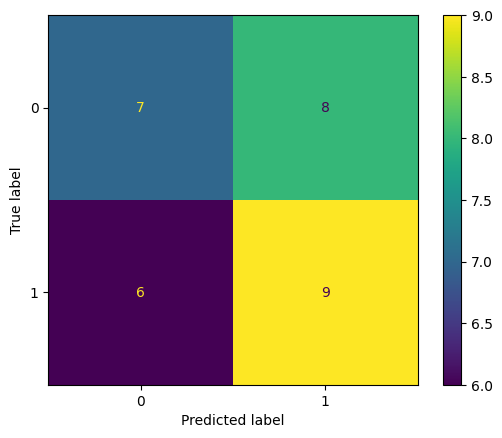

In [30]:
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

# Example continuous labels (replace with your actual dataset)
y = np.random.rand(100)  # Example continuous labels
X = np.random.rand(100, 10)  # Example features (100 samples, 10 features)

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Check the shapes of your data to ensure they are aligned
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")

# Convert continuous labels to binary classes (0 or 1) using thresholding at the median
y_train_class = np.where(y_train > np.median(y_train), 1, 0)
y_test_class = np.where(y_test > np.median(y_test), 1, 0)

# Check the unique values of the labels to ensure they are 0 or 1
print(f"Unique values in y_train_class: {np.unique(y_train_class)}")
print(f"Unique values in y_test_class: {np.unique(y_test_class)}")

# Initialize the classifier
clf = SVC(kernel='linear', random_state=42)

# Train the classifier with binary labels
clf.fit(X_train, y_train_class)

# Perform predictions on the test set
y_pred_class = clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test_class, y_pred_class)
print(f"Classification Accuracy: {accuracy * 100:.2f}%")

# Generate and display the confusion matrix
cm = confusion_matrix(y_test_class, y_pred_class)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot()



X_train shape: (70, 10)
y_train shape: (70,)
X_test shape: (30, 10)
y_test shape: (30,)
Unique values in y_train_class: [0 1]
Unique values in y_test_class: [0 1]
Classification Accuracy: 60.00%


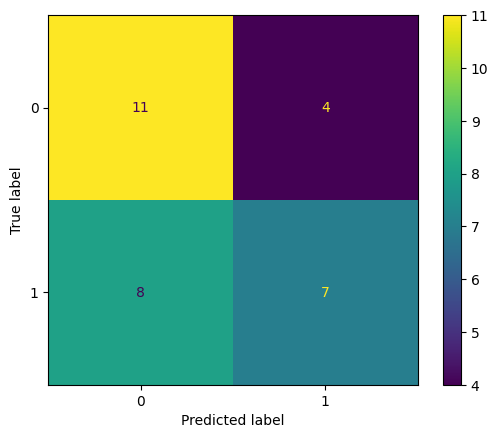

In [31]:
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

# Example continuous labels (replace with your actual dataset)
y = np.random.rand(100)  # Example continuous labels
X = np.random.rand(100, 10)  # Example features (100 samples, 10 features)

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Check the shapes of your data to ensure they are aligned
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")

# Convert continuous labels to binary classes (0 or 1) using thresholding at the median
y_train_class = np.where(y_train > np.median(y_train), 1, 0)
y_test_class = np.where(y_test > np.median(y_test), 1, 0)

# Check the unique values of the labels to ensure they are 0 or 1
print(f"Unique values in y_train_class: {np.unique(y_train_class)}")
print(f"Unique values in y_test_class: {np.unique(y_test_class)}")

# Initialize the classifier
clf = SVC(kernel='linear', random_state=42)

# Train the classifier with binary labels
clf.fit(X_train, y_train_class)

# Perform predictions on the test set
y_pred_class = clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test_class, y_pred_class)
print(f"Classification Accuracy: {accuracy * 100:.2f}%")

# Generate and display the confusion matrix
cm = confusion_matrix(y_test_class, y_pred_class)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot()



X_train shape: (70, 10)
y_train shape: (70,)
X_test shape: (30, 10)
y_test shape: (30,)
Unique values in y_train_class: [0 1]
Unique values in y_test_class: [0 1]
Classification Accuracy: 50.00%


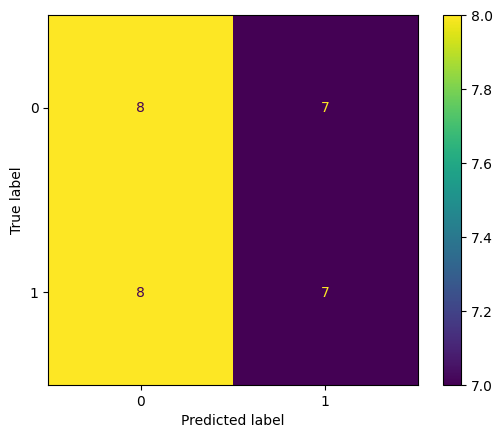

In [32]:
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

# Example continuous labels (replace with your actual dataset)
y = np.random.rand(100)  # Example continuous labels
X = np.random.rand(100, 10)  # Example features (100 samples, 10 features)

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Check the shapes of your data to ensure they are aligned
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")

# Convert continuous labels to binary classes (0 or 1) using thresholding at the median
y_train_class = np.where(y_train > np.median(y_train), 1, 0)
y_test_class = np.where(y_test > np.median(y_test), 1, 0)

# Check the unique values of the labels to ensure they are 0 or 1
print(f"Unique values in y_train_class: {np.unique(y_train_class)}")
print(f"Unique values in y_test_class: {np.unique(y_test_class)}")

# Initialize the classifier
clf = SVC(kernel='linear', random_state=42)

# Train the classifier with binary labels
clf.fit(X_train, y_train_class)

# Perform predictions on the test set
y_pred_class = clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test_class, y_pred_class)
print(f"Classification Accuracy: {accuracy * 100:.2f}%")

# Generate and display the confusion matrix
cm = confusion_matrix(y_test_class, y_pred_class)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot()



X_train shape: (70, 10)
y_train shape: (70,)
X_test shape: (30, 10)
y_test shape: (30,)
Unique values in y_train_class: [0 1]
Unique values in y_test_class: [0 1]
Classification Accuracy: 40.00%


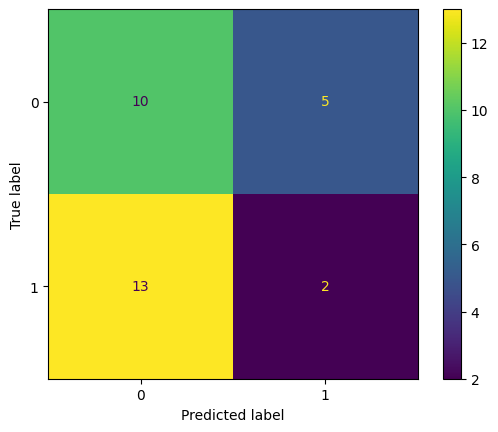

In [33]:
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

# Example continuous labels (replace with your actual dataset)
y = np.random.rand(100)  # Example continuous labels
X = np.random.rand(100, 10)  # Example features (100 samples, 10 features)

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Check the shapes of your data to ensure they are aligned
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")

# Convert continuous labels to binary classes (0 or 1) using thresholding at the median
y_train_class = np.where(y_train > np.median(y_train), 1, 0)
y_test_class = np.where(y_test > np.median(y_test), 1, 0)

# Check the unique values of the labels to ensure they are 0 or 1
print(f"Unique values in y_train_class: {np.unique(y_train_class)}")
print(f"Unique values in y_test_class: {np.unique(y_test_class)}")

# Initialize the classifier
clf = SVC(kernel='linear', random_state=42)

# Train the classifier with binary labels
clf.fit(X_train, y_train_class)

# Perform predictions on the test set
y_pred_class = clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test_class, y_pred_class)
print(f"Classification Accuracy: {accuracy * 100:.2f}%")

# Generate and display the confusion matrix
cm = confusion_matrix(y_test_class, y_pred_class)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot()



Random Forest True Accuracy: 56.67%
Random Forest Bootstrapping Test P-value: 0.2750


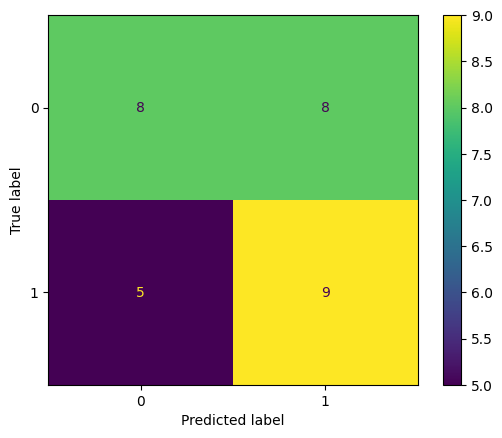

In [34]:
import numpy as np
from sklearn.utils import shuffle
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split

# Example continuous labels (replace with your actual dataset)
y = np.random.rand(100)  # Example continuous labels
X = np.random.rand(100, 10)  # Example features (100 samples, 10 features)

# Convert continuous labels to binary classes (0 or 1) using thresholding at the median
y_binned = np.where(y > np.median(y), 1, 0)

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y_binned, test_size=0.3, random_state=42)

# Initialize the Random Forest classifier
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the Random Forest classifier with original labels
rf_clf.fit(X_train, y_train)

# Make predictions and calculate the true accuracy for RF
y_pred_rf = rf_clf.predict(X_test)
true_accuracy_rf = accuracy_score(y_test, y_pred_rf)

# Number of iterations for bootstrapping
n_iterations = 1000

# Store accuracies for bootstrapped labels
bootstrapped_accuracies_rf = []

for i in range(n_iterations):
    # Shuffle the target labels for training and testing
    y_train_permuted = shuffle(y_train, random_state=i)
    y_test_permuted = shuffle(y_test, random_state=i)

    # Train the classifier on bootstrapped data
    rf_clf.fit(X_train, y_train_permuted)
    y_pred_permuted_rf = rf_clf.predict(X_test)

    # Calculate accuracy for bootstrapped labels
    bootstrapped_accuracy_rf = accuracy_score(y_test_permuted, y_pred_permuted_rf)
    bootstrapped_accuracies_rf.append(bootstrapped_accuracy_rf)

# Calculate the p-value by comparing true accuracy with bootstrapped accuracies for RF
bootstrapped_accuracies_rf = np.array(bootstrapped_accuracies_rf)
p_value_rf = np.mean(bootstrapped_accuracies_rf >= true_accuracy_rf)

# Output the results for Random Forest
print(f"Random Forest True Accuracy: {true_accuracy_rf * 100:.2f}%")
print(f"Random Forest Bootstrapping Test P-value: {p_value_rf:.4f}")

# Generate and display confusion matrix for Random Forest
cm_rf = confusion_matrix(y_test, y_pred_rf)
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=np.unique(y_train))
disp_rf.plot()

# Compare with previous SVM results (Assuming you already have SVM results)
# You can manually compare this output with your previous SVM results (true accuracy, p-value, confusion matrix).
